In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter


In [128]:
from sqlalchemy import create_engine

# Define connection parameters
DRIVER_NAME = "ODBC Driver 17 for SQL Server"  # Use the correct driver
SERVER_NAME = "JoyalVivobook"
DATABASE_NAME = "employees_db"

# Create SQLAlchemy engine
engine = create_engine(f"mssql+pyodbc://{SERVER_NAME}/{DATABASE_NAME}?trusted_connection=yes&driver={DRIVER_NAME}")


In [129]:
# Query to get all table names
query = "SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES WHERE TABLE_TYPE = 'BASE TABLE'"

# Fetch table names into Pandas DataFrame
tables_df = pd.read_sql(query, engine)

# Print the list of tables
print("Tables in the database:")
print(tables_df)

Tables in the database:
     TABLE_NAME
0   departments
1      dept_emp
2  dept_manager
3     employees
4      salaries
5        titles
6    final_data


In [130]:
# Fetch data into Pandas DataFrame
departments = pd.read_sql("SELECT * FROM departments", engine)
dept_emp = pd.read_sql("SELECT * FROM dept_emp", engine)
dept_manager = pd.read_sql("SELECT * FROM dept_manager", engine)
employees = pd.read_sql("SELECT * FROM employees", engine)
salaries = pd.read_sql("SELECT * FROM salaries", engine)
titles = pd.read_sql("SELECT * FROM titles", engine)

# Close the connection
engine.dispose()

In [131]:
dept_emp.dtypes

emp_no     object
dept_no    object
dtype: object

In [132]:
dept_emp['emp_no'].duplicated().sum()

31579

In [133]:
dept_manager.head()

,dept_no,emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183


In [134]:
dept_manager.dtypes

dept_no    object
emp_no      int64
dtype: object

In [135]:
employees.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,2,A,False,None
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,1,C,False,None
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,9,A,False,None
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,2,C,False,None
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,6,B,False,None


In [136]:
employees.dtypes

emp_no                      int64
emp_title_id               object
birth_date                 object
first_name                 object
last_name                  object
sex                        object
hire_date                  object
no_of_projects              int64
Last_performance_rating    object
left                         bool
last_date                  object
dtype: object

In [137]:
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [138]:
salaries.dtypes

emp_no    object
salary     int64
dtype: object

In [139]:
titles.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [140]:
titles.dtypes

title_id    object
title       object
dtype: object

In [141]:
employees[employees['emp_no']==110022]

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date
59074,110022,m0001,1956-09-12,Margareta,Markovitch,M,1985-01-01,1,C,False,None


In [142]:
dept_manager[dept_manager['emp_no']==110022]

,dept_no,emp_no
0,d001,110022


In [143]:
#CHecking null values
employees.isnull().sum()

emp_no                          0
emp_title_id                    0
birth_date                      0
first_name                      0
last_name                       0
sex                             0
hire_date                       0
no_of_projects                  0
Last_performance_rating         0
left                            0
last_date                  270157
dtype: int64

In [144]:
employees['emp_no'].duplicated().sum()

0

In [145]:
#Joined tables
df1=pd.merge(left=employees,right=dept_emp,left_on='emp_no',right_on='emp_no',how='inner')

ValueError: You are trying to merge on int64 and object columns for key 'emp_no'. If you wish to proceed you should use pd.concat

In [146]:
dept_emp['emp_no']=dept_emp['emp_no'].astype(int)

In [147]:
dept_emp.dtypes

emp_no      int32
dept_no    object
dtype: object

In [148]:
employees.dtypes

emp_no                      int64
emp_title_id               object
birth_date                 object
first_name                 object
last_name                  object
sex                        object
hire_date                  object
no_of_projects              int64
Last_performance_rating    object
left                         bool
last_date                  object
dtype: object

In [149]:
#Joined tables
df1=pd.merge(left=employees,right=dept_emp,left_on='emp_no',right_on='emp_no',how='inner')

In [150]:
df1

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date,dept_no
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,2,A,False,None,d002
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07,1,C,False,None,d004
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21,9,A,False,None,d004
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,2,C,False,None,d003
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18,6,B,False,None,d006
...,...,...,...,...,...,...,...,...,...,...,...,...
331598,255832,e0002,1955-05-08,Yuping,Dayang,F,1995-02-26,10,A,False,None,d004
331599,76671,s0001,1959-06-09,Ortrud,Plessier,M,1988-02-24,8,B,False,None,d007
331600,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,1,B,False,None,d002
331601,264920,s0001,1959-09-22,Percy,Samarati,F,1994-09-08,1,B,False,None,d007


In [151]:
df2=pd.merge(left=df1,right=titles,left_on='emp_title_id',right_on='title_id',how='inner')

In [152]:
df3=pd.merge(left=df2,right=salaries,on='emp_no',how='inner')

ValueError: You are trying to merge on int64 and object columns for key 'emp_no'. If you wish to proceed you should use pd.concat

In [153]:
salaries.dtypes

emp_no    object
salary     int64
dtype: object

In [154]:
salaries['emp_no']=salaries['emp_no'].astype(int)

In [155]:
df3=pd.merge(left=df2,right=salaries,on='emp_no',how='inner')

In [156]:
final_df=pd.merge(left=df3,right=departments,on='dept_no',how='inner')

In [157]:
final_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date,dept_no,title_id,title,salary,dept_name
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,2,A,False,None,d002,s0001,Staff,40000,Finance
1,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,9,B,False,None,d002,s0001,Staff,63016,Finance
2,424270,s0001,1963-01-15,Kellyn,Yoshizawa,F,1995-05-08,8,A,False,None,d002,s0001,Staff,60678,Finance
3,37473,s0001,1952-03-06,Prasadram,Valette,M,1994-02-16,3,PIP,False,None,d002,s0001,Staff,55963,Finance
4,293744,s0001,1952-04-29,Kolar,Carrere,M,1987-06-30,2,B,False,None,d002,s0001,Staff,40000,Finance


In [158]:
final_df.dtypes

emp_no                      int64
emp_title_id               object
birth_date                 object
first_name                 object
last_name                  object
sex                        object
hire_date                  object
no_of_projects              int64
Last_performance_rating    object
left                         bool
last_date                  object
dept_no                    object
title_id                   object
title                      object
salary                      int64
dept_name                  object
dtype: object

In [160]:
final_df.shape

(331603, 16)

In [161]:
final_df.to_csv("output.csv",index=False)

In [163]:
final_df=pd.read_csv("output.csv")

In [162]:
final_df['hire_date']=pd.to_datetime(final_df['hire_date'],format='%Y-%m-%d')


In [66]:
final_df['birth_date']=pd.to_datetime(final_df['birth_date'],format='%Y-%m-%d')


In [67]:
final_df['last_date']=pd.to_datetime(final_df['last_date'],format='%Y-%m-%d')


In [68]:
final_df.head()

,Unnamed: 0,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date,dept_no,title_id,title,salary,dept_name
0,0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,2,A,False,NaT,d002,s0001,Staff,40000,Finance
1,1,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,9,B,False,NaT,d002,s0001,Staff,63016,Finance
2,2,424270,s0001,1963-01-15,Kellyn,Yoshizawa,F,1995-05-08,8,A,False,NaT,d002,s0001,Staff,60678,Finance
3,3,37473,s0001,1952-03-06,Prasadram,Valette,M,1994-02-16,3,PIP,False,NaT,d002,s0001,Staff,55963,Finance
4,4,293744,s0001,1952-04-29,Kolar,Carrere,M,1987-06-30,2,B,False,NaT,d002,s0001,Staff,40000,Finance


In [69]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331603 entries, 0 to 331602
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Unnamed: 0               331603 non-null  int64         
 1   emp_no                   331603 non-null  int64         
 2   emp_title_id             331603 non-null  object        
 3   birth_date               331603 non-null  datetime64[ns]
 4   first_name               331603 non-null  object        
 5   last_name                331603 non-null  object        
 6   sex                      331603 non-null  object        
 7   hire_date                331603 non-null  datetime64[ns]
 8   no_of_projects           331603 non-null  int64         
 9   Last_performance_rating  331603 non-null  object        
 10  left                     331603 non-null  bool          
 11  last_date                33021 non-null   datetime64[ns]
 12  dept_no         

## Classify employee as Left or not left

### Plot distributions

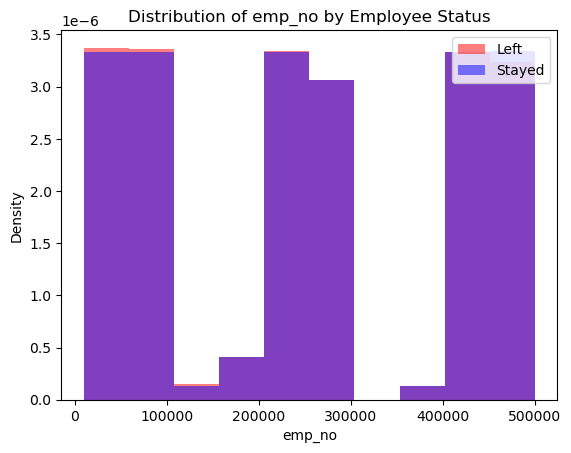

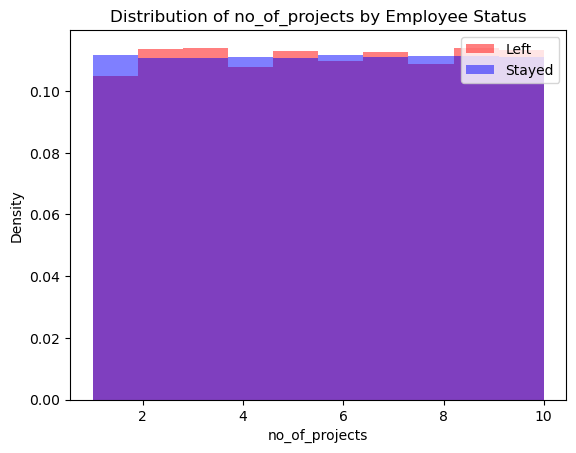

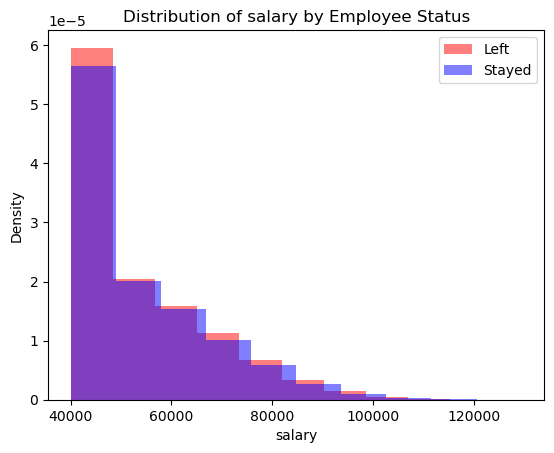

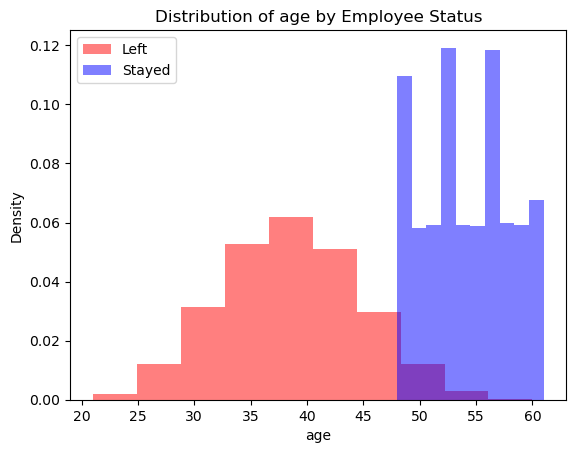

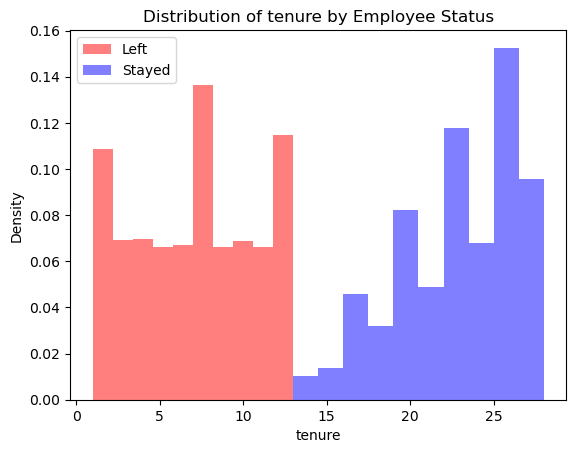

In [260]:
for label in final_df.select_dtypes(include=['number']).columns:  # Only numeric columns
    plt.hist(final_df[final_df['left'] == True][label], color='red', alpha=0.5, density=True, label='Left')
    plt.hist(final_df[final_df['left'] == False][label], color='blue', alpha=0.5, density=True, label='Stayed')
    plt.xlabel(label)
    plt.ylabel("Density")
    plt.legend()
    plt.title(f"Distribution of {label} by Employee Status")
    plt.show()


In [261]:
min_value = final_df['salary'].min()
max_value = final_df['salary'].max()

print(f"Min: {min_value}, Max: {max_value}, Range: {max_value - min_value}")


Min: 40000, Max: 129492, Range: 89492


In [262]:
min_value = final_df['age'].min()
max_value = final_df['age'].max()

print(f"Min: {min_value}, Max: {max_value}, Range: {max_value - min_value}")


Min: 21, Max: 61, Range: 40


In [263]:
min_value = final_df['tenure'].min()
max_value = final_df['tenure'].max()

print(f"Min: {min_value}, Max: {max_value}, Range: {max_value - min_value}")


Min: 1, Max: 28, Range: 27


In [9]:
import numpy as np
import pandas as pd

# Function to create 4 bins with unique edges
def get_bins(series):
    q1, q2, q3 = np.quantile(series, [0.25, 0.50, 0.75])
    bins = np.unique([series.min(), q1, q2, q3, series.max() + 1e-5])  # Add epsilon to max
    return bins

# Function to create range labels from bins
def get_range_labels(bins):
    labels = []
    for i in range(len(bins) - 1):
        # Format numbers to remove unnecessary decimals
        low = f"{bins[i]:.0f}" if bins[i].is_integer() else f"{bins[i]:.2f}"
        high = f"{bins[i+1]:.0f}" if bins[i+1].is_integer() else f"{bins[i+1]:.2f}"
        labels.append(f"{low}-{high}")
    return labels

# Generate bins (no salary)
age_bins = get_bins(final_df['age'])
tenure_bins = get_bins(final_df['tenure'])

# Apply binning with range labels
final_df['age_group'] = pd.cut(final_df['age'], 
                              bins=age_bins, 
                              include_lowest=True, 
                              labels=get_range_labels(age_bins))

final_df['tenure_group'] = pd.cut(final_df['tenure'], 
                                 bins=tenure_bins, 
                                 include_lowest=True, 
                                 labels=get_range_labels(tenure_bins))

In [265]:
final_df.to_csv("output.csv", index=False)

In [266]:
final_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,left,last_date,dept_no,title_id,title,salary,dept_name,age,tenure,age_group,tenure_group
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,2,A,False,2013-03-10,d002,s0001,Staff,40000,Finance,59,22,57-61.00,19-23
1,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,9,B,False,2013-03-10,d002,s0001,Staff,63016,Finance,49,19,21-50,1-19
2,424270,s0001,1963-01-15,Kellyn,Yoshizawa,F,1995-05-08,8,A,False,2013-03-10,d002,s0001,Staff,60678,Finance,50,17,21-50,1-19
3,37473,s0001,1952-03-06,Prasadram,Valette,M,1994-02-16,3,PIP,False,2013-03-10,d002,s0001,Staff,55963,Finance,61,19,57-61.00,1-19
4,293744,s0001,1952-04-29,Kolar,Carrere,M,1987-06-30,2,B,False,2013-03-10,d002,s0001,Staff,40000,Finance,60,25,57-61.00,23-25


### Logistic regression with pd.get_dummies

In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# ================== 1️⃣ Keep Only Required Columns ==================
categorical_cols = ['sex', 'title', 'Last_performance_rating','age_group', 'tenure_group']  # Treat no_of_projects as categorical
target = 'left'

final_df = final_df[categorical_cols + [target]]

# ✅ Encoding categorical variables using pd.get_dummies()
final_df = pd.get_dummies(final_df, columns=categorical_cols, drop_first=True)

# ✅ Separating features and target variable
X = final_df.drop(columns=[target])  # Features
y = final_df[target].astype(int)  # Target variable (0 = stayed, 1 = left)

# ================== 2️⃣ Train-Test Split ==================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ================== 3️⃣ Apply Random Oversampling to Handle Class Imbalance ==================
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# ================== 4️⃣ Model Training with Logistic Regression ==================
clf = LogisticRegression(solver='saga', class_weight='balanced', random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# ================== 5️⃣ Model Evaluation ==================
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9556

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     89575
           1       0.70      0.97      0.81      9906

    accuracy                           0.96     99481
   macro avg       0.85      0.96      0.89     99481
weighted avg       0.97      0.96      0.96     99481


Confusion Matrix:
 [[85433  4142]
 [  270  9636]]


### Random Forest classifier

In [128]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# ================== 1️⃣ Keep Only Required Columns ==================
categorical_cols = ['sex', 'title', 'Last_performance_rating','age_group', 'tenure_group']  # Only these categorical features
target = 'left'

final_df = final_df[categorical_cols + [target]]

# ✅ Encoding categorical variables using pd.get_dummies()
final_df = pd.get_dummies(final_df, columns=categorical_cols, drop_first=True)

# ✅ Separating features and target variable
X = final_df.drop(columns=[target])  # Features
y = final_df[target].astype(int)  # Target variable (0 = stayed, 1 = left)

# ================== 2️⃣ Train-Test Split ==================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ================== 3️⃣ Apply Random Oversampling to Handle Class Imbalance ==================
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# ================== 4️⃣ Model Training with Random Forest ==================
clf = RandomForestClassifier(
    n_estimators=100,  # Number of trees
    random_state=42,
    class_weight='balanced'  # Handle class imbalance
)
clf.fit(X_train_resampled, y_train_resampled)

# ================== 5️⃣ Model Evaluation ==================
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9553

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     89575
           1       0.70      0.97      0.81      9906

    accuracy                           0.96     99481
   macro avg       0.85      0.96      0.89     99481
weighted avg       0.97      0.96      0.96     99481


Confusion Matrix:
 [[85401  4174]
 [  268  9638]]


### KNN code

In [136]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler

# ================== 1️⃣ Keep Only Required Columns ==================
categorical_cols = ['sex', 'title', 'Last_performance_rating','age_group', 'tenure_group']  # Only these categorical features
target = 'left'

final_df = final_df[categorical_cols + [target]]

# ✅ Encoding categorical variables using pd.get_dummies()
final_df = pd.get_dummies(final_df, columns=categorical_cols, drop_first=True)

# ✅ Separating features and target variable
X = final_df.drop(columns=[target])  # Features
y = final_df[target].astype(int)  # Target variable (0 = stayed, 1 = left)

# ================== 2️⃣ Train-Test Split ==================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ================== 3️⃣ Apply Random Oversampling to Handle Class Imbalance ==================
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Check class distribution before and after oversampling
print("Original training class distribution:", np.bincount(y_train))
print("Resampled training class distribution:", np.bincount(y_train_resampled))

# ================== 4️⃣ Model Training with KNN ==================
clf = KNeighborsClassifier(n_neighbors=5, weights='distance')  # Added weights='distance' for imbalance
clf.fit(X_train_resampled, y_train_resampled)

# ================== 5️⃣ Model Evaluation ==================
y_pred = clf.predict(X_test)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Original training class distribution: [209007  23115]
Resampled training class distribution: [209007 209007]

Accuracy: 0.9478

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97     89575
           1       0.66      0.98      0.79      9906

    accuracy                           0.95     99481
   macro avg       0.83      0.96      0.88     99481
weighted avg       0.96      0.95      0.95     99481


Confusion Matrix:
 [[84616  4959]
 [  236  9670]]


### XGBOOST 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import xgboost as xgb

import numpy as np
import pandas as pd

final_df=pd.read_csv("output.csv")

# Function to create 4 bins with unique edges
def get_bins(series):
    q1, q2, q3 = np.quantile(series, [0.25, 0.50, 0.75])
    bins = np.unique([series.min(), q1, q2, q3, series.max() + 1e-5])  # Add epsilon to max
    return bins

# Function to create range labels from bins
def get_range_labels(bins):
    labels = []
    for i in range(len(bins) - 1):
        # Format numbers to remove unnecessary decimals
        low = f"{bins[i]:.0f}" if bins[i].is_integer() else f"{bins[i]:.2f}"
        high = f"{bins[i+1]:.0f}" if bins[i+1].is_integer() else f"{bins[i+1]:.2f}"
        labels.append(f"{low}-{high}")
    return labels

# Generate bins (no salary)
age_bins = get_bins(final_df['age'])
tenure_bins = get_bins(final_df['tenure'])

# Apply binning with range labels
final_df['age_group'] = pd.cut(final_df['age'], 
                              bins=age_bins, 
                              include_lowest=True, 
                              labels=get_range_labels(age_bins))

final_df['tenure_group'] = pd.cut(final_df['tenure'], 
                                 bins=tenure_bins, 
                                 include_lowest=True, 
                                 labels=get_range_labels(tenure_bins))

# ================== 1️⃣ Keep Only Required Columns ==================
categorical_cols = ['sex', 'title', 'Last_performance_rating', 'age_group', 'tenure_group']  # Only these categorical features
target = 'left'

final_df = final_df[categorical_cols + [target]]

# ✅ Encoding categorical variables using pd.get_dummies() and ensuring dense numerical output
final_df = pd.get_dummies(final_df, columns=categorical_cols, drop_first=True, sparse=False, dtype=int)

# ✅ Separating features and target variable
X = final_df.drop(columns=[target])  # Features
y = final_df[target].astype(int)  # Target variable (0 = stayed, 1 = left)

# ================== 2️⃣ Train-Test Split ==================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Check original class distribution
print("Original training class distribution:", np.bincount(y_train))

# Convert X_train to dense numerical format explicitly (if not already)
X_train = X_train.astype(int)  # Ensure X_train is dense and numerical

# ================== 3️⃣ Apply SMOTE Oversampling ==================
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check resampled class distribution
print("Resampled training class distribution:", np.bincount(y_train_resampled))

# ================== 4️⃣ Model Training with XGBoost ==================
clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
    # scale_pos_weight omitted since SMOTE balances classes
)
clf.fit(X_train_resampled, y_train_resampled)

# ================== 5️⃣ Model Evaluation ==================
y_pred = clf.predict(X_test)
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Original training class distribution: [209007  23115]
Resampled training class distribution: [209007 209007]


c:\Users\Joyal\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:22:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Accuracy: 0.9554

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     89575
           1       0.70      0.97      0.81      9906

    accuracy                           0.96     99481
   macro avg       0.85      0.96      0.89     99481
weighted avg       0.97      0.96      0.96     99481


Confusion Matrix:
 [[85407  4168]
 [  269  9637]]


## ANN algoritm

In [180]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# ================== 1️⃣ Keep Only Required Columns ==================
categorical_cols = ['sex', 'title', 'Last_performance_rating', 'age_group', 'tenure_group'] 
target = 'left'

final_df = final_df[categorical_cols + [target]]
final_df = pd.get_dummies(final_df, columns=categorical_cols, drop_first=True)

X = final_df.drop(columns=[target])
y = final_df[target].astype(int)

# ================== 2️⃣ Train-Test Split ==================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ================== 3️⃣ Apply Random Oversampling ==================
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# ✅ Check class balance after oversampling
print("Class distribution after oversampling:")
print(pd.Series(y_train_resampled).value_counts())

# ================== 4️⃣ Build and Train ANN Model ==================
model = Sequential([
    tf.keras.layers.Input(shape=(X_train_resampled.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Adjusted class weights (less aggressive)
class_weight = {0: 1.0, 1: 5.0}  # Try 1:5 instead of 1:9

# Train for 3 epochs
history = model.fit(X_train_resampled, y_train_resampled, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2, 
                    class_weight=class_weight, 
                    verbose=1)

# ================== 5️⃣ Model Evaluation ==================
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Class distribution after oversampling:
left
0    238865
1    238865
Name: count, dtype: int64
Epoch 1/10
11944/11944 ━━━━━━━━━━━━━━━━━━━━ 30s 2ms/step - accuracy: 0.9165 - loss: 0.3138 - val_accuracy: 0.9869 - val_loss: 0.0402
Epoch 2/10
11944/11944 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step - accuracy: 0.9402 - loss: 0.2321 - val_accuracy: 0.9916 - val_loss: 0.0342
Epoch 3/10
11944/11944 ━━━━━━━━━━━━━━━━━━━━ 62s 5ms/step - accuracy: 0.9405 - loss: 0.2300 - val_accuracy: 0.9917 - val_loss: 0.0371
Epoch 4/10
11944/11944 ━━━━━━━━━━━━━━━━━━━━ 77s 6ms/step - accuracy: 0.9404 - loss: 0.2288 - val_accuracy: 0.9908 - val_loss: 0.0450
Epoch 5/10
11944/11944 ━━━━━━━━━━━━━━━━━━━━ 63s 5ms/step - accuracy: 0.9415 - loss: 0.2281 - val_accuracy: 0.9907 - val_loss: 0.0396
Epoch 6/10
11944/11944 ━━━━━━━━━━━━━━━━━━━━ 61s 5ms/step - accuracy: 0.9406 - loss: 0.2290 - val_accuracy: 0.9914 - val_loss: 0.0356
Epoch 7/10
11944/11944 ━━━━━━━━━━━━━━━━━━━━ 66s 4ms/step - accuracy: 0.9407 - loss: 0.2285 - val_accuracy: 0

In [78]:
final_df.head()

,Unnamed: 0,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,no_of_projects,Last_performance_rating,...,last_date,dept_no,title_id,title,salary,dept_name,age,tenure,age_group,tenure_group
0,0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,2,A,...,NaT,d002,s0001,Staff,40000,Finance,NaN,NaN,NaN,NaN
1,1,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,9,B,...,NaT,d002,s0001,Staff,63016,Finance,NaN,NaN,NaN,NaN
2,2,424270,s0001,1963-01-15,Kellyn,Yoshizawa,F,1995-05-08,8,A,...,NaT,d002,s0001,Staff,60678,Finance,NaN,NaN,NaN,NaN
3,3,37473,s0001,1952-03-06,Prasadram,Valette,M,1994-02-16,3,PIP,...,NaT,d002,s0001,Staff,55963,Finance,NaN,NaN,NaN,NaN
4,4,293744,s0001,1952-04-29,Kolar,Carrere,M,1987-06-30,2,B,...,NaT,d002,s0001,Staff,40000,Finance,NaN,NaN,NaN,NaN


In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as ImbPipeline  # Pipeline supporting SMOTE
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# 📌 Load dataset 
final_df=pd.read_csv("output.csv")
final_df['hire_date']=pd.to_datetime(final_df['hire_date'],format='%Y-%m-%d')
final_df['birth_date']=pd.to_datetime(final_df['birth_date'],format='%Y-%m-%d')
final_df['last_date']=pd.to_datetime(final_df['last_date'],format='%Y-%m-%d')

final_df['last_date'] = final_df['last_date'].fillna(final_df['last_date'].max())

final_df['age'] = (final_df['last_date'] - final_df['birth_date']).dt.days // 365  # Convert days to years
final_df['tenure']=(final_df['last_date'] - final_df['hire_date']).dt.days // 365

# Function to create 4 bins with unique edges
def get_bins(series):
    q1, q2, q3 = np.quantile(series, [0.25, 0.50, 0.75])
    bins = np.unique([series.min(), q1, q2, q3, series.max() + 1e-5])  # Add epsilon to max
    return bins

# Function to create range labels from bins
def get_range_labels(bins):
    labels = []
    for i in range(len(bins) - 1):
        # Format numbers to remove unnecessary decimals
        low = f"{bins[i]:.0f}" if bins[i].is_integer() else f"{bins[i]:.2f}"
        high = f"{bins[i+1]:.0f}" if bins[i+1].is_integer() else f"{bins[i+1]:.2f}"
        labels.append(f"{low}-{high}")
    return labels

# Generate bins (no salary)
age_bins = get_bins(final_df['age'])
tenure_bins = get_bins(final_df['tenure'])

# Apply binning with range labels
final_df['age_group'] = pd.cut(final_df['age'], 
                              bins=age_bins, 
                              include_lowest=True, 
                              labels=get_range_labels(age_bins))

final_df['tenure_group'] = pd.cut(final_df['tenure'], 
                                 bins=tenure_bins, 
                                 include_lowest=True, 
                                 labels=get_range_labels(tenure_bins))

# Define categorical columns (all features are categorical)
categorical_cols = ['sex', 'title','dept_name', 'Last_performance_rating', 'age_group', 'tenure_group']
target = 'left'

final_df = final_df[categorical_cols + [target]]

X = final_df.drop(columns=[target])  # Features
y = final_df[target].astype(int)  # Target (Convert to int: 0 = stayed, 1 = left)

# Store feature order before transformation
feature_order = X.columns.tolist()

# ================== 2️⃣ Train-Test Split ==================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# ================== 3️⃣ Define Preprocessing Pipeline ==================
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
])

# ================== 4️⃣ Define Full Pipeline with SMOTE & XGBoost ==================
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),  
    ('classifier', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42))
])

# ================== 5️⃣ Train Model ==================
pipeline.fit(X_train, y_train)

# Store feature order and binning info inside pipeline
pipeline.feature_order = feature_order
pipeline.age_bins = age_bins
pipeline.tenure_bins = tenure_bins
pipeline.age_labels = get_range_labels(age_bins)
pipeline.tenure_labels = get_range_labels(tenure_bins)

# Save the trained pipeline
joblib.dump(pipeline, "model_pipeline.pkl")

# ✅ Save the trained pipeline
joblib.dump(pipeline, "model_pipeline.pkl")

# ================== 6️⃣ Model Evaluation ==================
y_pred = pipeline.predict(X_test)
print("✅ Model training complete. Pipeline saved as 'model_pipeline.pkl'.")
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Model training complete. Pipeline saved as 'model_pipeline.pkl'.

Accuracy: 0.9556

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     89575
           1       0.70      0.97      0.81      9906

    accuracy                           0.96     99481
   macro avg       0.85      0.96      0.89     99481
weighted avg       0.97      0.96      0.96     99481


Confusion Matrix:
 [[85433  4142]
 [  270  9636]]


In [164]:
final_df=pd.read_csv("output.csv")

In [165]:
# Take a random sample of 1000 rows
random_1000_rows = final_df.sample(n=1000, random_state=42)

# Save to CSV
random_1000_rows.to_csv("random_1000_rows.csv", index=False)

print("Random 1000 rows saved successfully!")

Random 1000 rows saved successfully!


In [125]:
# ✅ Load model
pipeline = joblib.load("model_pipeline.pkl")

# ✅ Load new data and reorder columns
new_data = pd.read_csv("random_1000_rows.csv")
new_data = new_data[pipeline.feature_order]  # Ensure correct column order

# ✅ Make predictions
predictions = pipeline.predict(new_data)
print(predictions)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 

In [126]:
final_df.head()

,sex,title,dept_name,Last_performance_rating,age_group,tenure_group,left
0,M,Staff,Finance,A,57-61.00,19-23,False
1,M,Staff,Finance,B,21-50,1-19,False
2,F,Staff,Finance,A,21-50,1-19,False
3,M,Staff,Finance,PIP,57-61.00,1-19,False
4,M,Staff,Finance,B,57-61.00,23-25,False


In [167]:
random_1000_rows.columns

Index(['emp_no', 'emp_title_id', 'birth_date', 'first_name', 'last_name',
       'sex', 'hire_date', 'no_of_projects', 'Last_performance_rating', 'left',
       'last_date', 'dept_no', 'title_id', 'title', 'salary', 'dept_name'],
      dtype='object')